# Artificial Intelligence - Laboratory 04 : Uninformed Search



## Introduction

For an _informed search algorithm_ such as **A\***, to find the solution efficiently, the information given by `heuristics` or `path cost` is leveraged to explore through the search space.
However, there are algorithms which traverse the search space without having any prior knowledge - _uninformed search algorithms_.

Furthermore, last laboratory we assumed that the action `a` performed for a particular state `s` always has the same result (a deterministic environment).
In this lab we will be using a non-deterministic environment, in which, starting from the same state `s`, the same action `a` can lead to different results.

Mathematically speaking, in a _blind search problem_ for a particular action `a` in a state `s`, the resulting states are modelled by a `probability distribution`.

\begin{equation*}
SXA \mapsto P(S)
\end{equation*}

## Today's Challenge

In a one-dimensional plane, with only two cells, use a `non-deterministic vacuum cleaner` to move left, right or clean the search space represented as an AND/OR search tree.

To formulate the problem for a deterministic vacuum cleaner, the set of actions includes: _Left, Right, Clean_.
 
For a non-deterministic situation:
* if the vacuum cleaner visits a clean cell, the cell becomes either clean or dirty.
* if the vacuum cleaner visits a dirty cell, the cell becomes clean with a possibility to clean its right neighbour too.

Useful variables:
* `state` -> the coordinates of the vacuum cleaner; (in our case either (0,0) or (1,0) representing the left and right cell)
* `env` -> state of the environment; (a 2-integer tuple, in which 0 is clean and 1 is dirty)
* `moves` -> the possible actions in the search space;
* `effects` -> the effect of a move on the `state`'s of vacuum cleaner and `env`ironment. It has the following structure:

```python
effectD/N[move_option] = [(movement_direction, cell_effect_if_clean, cell_effect_if_dirty)]
```

In [39]:
# Dimensions of the plane.
width = 2
height = 1

# The empty cells are marked with 1 meaning dirty cell.
env = [[1 for x in range(width)] for y in range(height)]

# Start point.
start = (0, 0)

# Current state of the environment.
print(f'Current state {env}.')

Current state [[1, 1]].


In [40]:
# Possible moves.
moves = ['Left', 'Right', 'Clean']

"""
Possible effects as a tuple of (dx, dy, cleanness), where:
    - dx and dy are the relative position of the current cell;
    - the cleanness of a cell is marked w\ 0 or 1 for the computed effect 
    or w\ -1 if the environment remains unchanged.
"""

# Deterministic effects:
effectD = {}
effectD['Left'] = [(-1, 0, -1, -1, -1, -1)]
effectD['Right'] = [(+1, 0, -1, -1, -1, -1)]
effectD['Clean'] = [(0, 0, 0, -1, 0, -1)]
 
# Non-deterministic effects:
effectN = {}
effectN['Left'] = effectD['Left']
effectN['Right'] = effectD['Right']
effectN['Clean'] = [(0, 0, 0, -1, 0, -1), (0, 0, 1, -1, 0, 0)]
"""
The last line can be read as:
    - the vacuum doesn't move (0,0) in either case
    - if the current cell is clean, the cell can either remain clean (0, -1) or
    get dirty (1, -1)
    - if the cell is dirty, the current cell can be cleaned (0, -1)
    or both the current cell and the cell on its right can be cleaned (0, 0)
"""

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_184223/2809560939.py:4: SyntaxWarning: invalid escape sequence '\ '
  """


"\nThe last line can be read as:\n    - the vacuum doesn't move (0,0) in either case\n    - if the current cell is clean, the cell can either remain clean (0, -1) or\n    get dirty (1, -1)\n    - if the cell is dirty, the current cell can be cleaned (0, -1)\n    or both the current cell and the cell on its right can be cleaned (0, 0)\n"

### Helpful functions

* `reduce` (from the `functools` module) can successively apply a function on a list (on the first 2 elements, then on the result and the third and so on):

```python
    reduce(function, sequence)
```

In [41]:
import operator
from functools import reduce

In [42]:
# Short demo:
reduce((lambda x, y: x-y), [-2, -1, 0, 1, 2])
# (((-2 - (-1)) - 0) - 1) - 2

-4

In [43]:
# Verifies if the position of a cell corresponds to the dimensions of the plane.
def is_good(state):
    return state[0] >= 0 and state[0] < width and state[1] >= 0 and state[1] < height

# Returns True if all the cells of the environment are Clean.
def env_clean(env):    
    return 0 == len(list(filter(lambda x: x > 0, reduce(operator.add, env, []))))

# Returns a list of tuples [(new_state, new_env)] and the deterministic effect of a move. 
# The list is empty if the movement cannot be performed.
def compute_effectD(state, env, move):
    return compute_effects(state, env, move, effectD)

# Returns a list of tuples [(new_state, new_env)] and the non-deterministic effect of a move. 
# The list has zero (is empty if the movement cannot be performed), one or more distinct elements.
def compute_effectN(state, env, move):
    return compute_effects(state, env, move, effectN)
    
def compute_effects(state, env, move, effects):
    effects = [compute_effect(state, env, effect) for effect in effects[move]]
    effects = list(filter(lambda e: e is not None, effects))
    if len(effects) == 2 and effects[0] == effects[1]:
        return effects[:1]
    return effects
    
def compute_effect(state, env, effect):
    new_env = [line[:] for line in env]
    (x, y) = state
    new_state = tuple([state[idx] + effect[idx] for idx in range(2)])
    if not is_good(new_state):
        return None
    
    for d in range(2):
        clean_effect = effect[2 + d + env[y][x] * 2]
        if clean_effect >= 0 and is_good((x + d, y)):
            new_env[y][x + d] = clean_effect
    return (new_state, new_env)

In [44]:
print(f'Is the environment clean?: {env_clean(env)}')
print(f'What is our move set?: {moves}')
print(f'How does the environment look?: {env}')
print('The vacuum is in the left cell and we try to execute each move in the order stated above:')
print(f'{[compute_effectD((0, 0), env, m) for m in  moves]} -> note that Left is an illegal move here')
print('The vacuum is in the right cell and we try to execute each move in the order stated above:')
print(f'{[compute_effectD((1, 0), env, m) for m in  moves]} -> note that Right is an illegal move here')
print('The vacuum is in the left cell and we try to clean in a non-deterministic environment:')
print(compute_effectN((0, 0), env, 'Clean'))

Is the environment clean?: False
What is our move set?: ['Left', 'Right', 'Clean']
How does the environment look?: [[1, 1]]
The vacuum is in the left cell and we try to execute each move in the order stated above:
[[], [((1, 0), [[1, 1]])], [((0, 0), [[0, 1]])]] -> note that Left is an illegal move here
The vacuum is in the right cell and we try to execute each move in the order stated above:
[[((0, 0), [[1, 1]])], [], [((1, 0), [[1, 0]])]] -> note that Right is an illegal move here
The vacuum is in the left cell and we try to clean in a non-deterministic environment:
[((0, 0), [[0, 1]]), ((0, 0), [[0, 0]])]


### AND/OR Tree Search

A node of the tree has the following six elements:

- the type of the selected action for a cell (`op` element in the parent node): it can be an `OR` node or an `AND` node;
- the current `state` of the vacuum cleaner (the position of an AND node applies should be transfered the children);
- the current state of the `env`ironment (the environment of an AND node applies should be transfered the children);
- `children`: a node has a subtree for its representation;
- `parent`: the parent of the node, _None_ if the current node is the root of the tree;
- `tag`: _None_, _Cycle_, _Solved_, _Fail_.

The `class Node` designs the elements of the tree:

In [45]:
class Node:
    def __init__(self, op, state, env, tag=None, children=None):
        # AND / OR type of the node
        self.op = op
        self.state = state
        self.env = env
        self.children = {} if children is None else children
        self.parent = None
        self.tag = tag
    
    def add_child(self, move, child):
        if child == self:
            return
        self.children[move] = child
        child.parent = self
      
    def __str__(self):
        tag = ''
        if self.tag is not None:
            tag = str(self.tag)
        return str(self.op) + " : " + str(self.state) + " : " + str(self.env) + " (" + str(len(self.children.values())) + ") [" + tag + "]"

To display a tree with nodes defined in the `Node class`, we pass as arguments the `root node` and the `onlyOR` parameter indicating the type of nodes in the tree. For instance, if `onlyOR` is `False` the tree is an AND/OR tree.

In [46]:
counter = 0
labels = {}
nodes = []
edges = []

def print_tree(root, onlyOR = False):
    print_tree_ex(root, 0, onlyOR)

def print_tree_ex(node, indent, onlyOR, edge = None):
    global counter
    line = ""
    edge = str(edge) if edge is not None else ""
    for i in range(indent):
        line += "   "
    if node.op == "OR":
        line += "-> "+edge+" <OR> "
        line += str(node.state[0]) + " : " + str(node.env)
    else:
        line += "-> "+edge+" <" + node.op + "> - "
        if onlyOR:
            line += str(node.state[0]) + " : " + str(node.env)
    if node.tag is not None:
        line += " " + str(node.tag)
    print(line)
    counter += 1
    nodes.append(counter)
    if node.parent is not None:
        edges.append((node.parent, counter))
    labels[counter] = line
    for move, child in node.children.items():
        print_tree_ex(child, indent + 1, onlyOR, move)

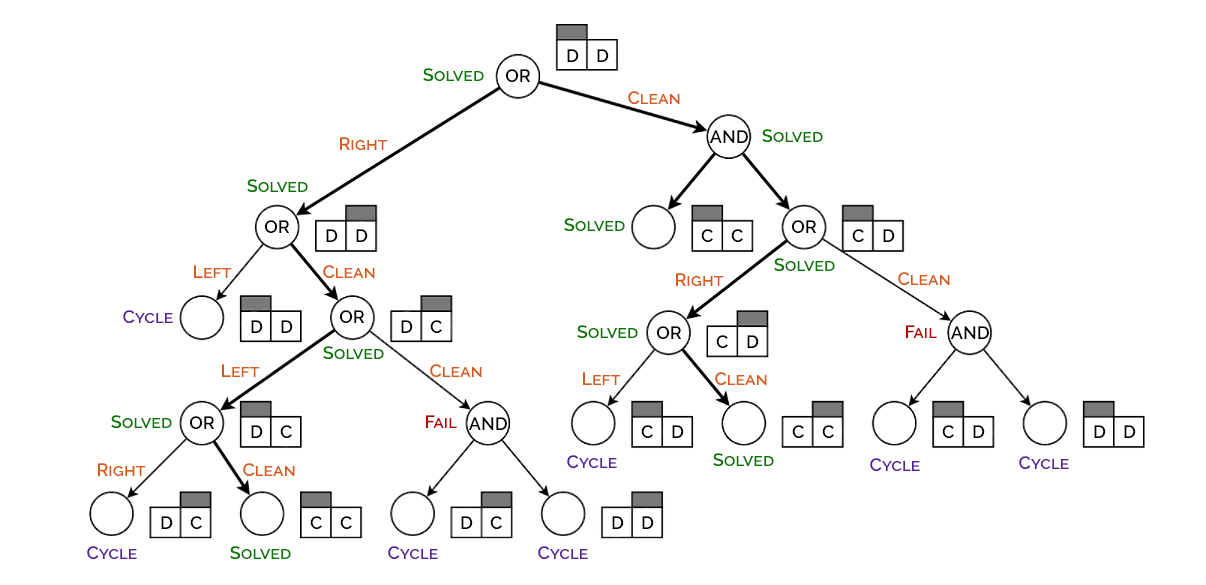

### Task 0

**a.** Define the `root node`, using the _"Example"_ `tag` and the initial conditions of the problem(`state` and `env`). 

In [47]:
# Your implementation here
root = Node("OR", start, env, tag="Example")
print(root)

OR : (0, 0) : [[1, 1]] (0) [Example]


To link the deterministic or non-deterministic effects of a move to a node, we need two additional functions:

In [48]:
def compute_effects_on_node(node, move, deterministic):
    if deterministic:
        effects = compute_effectD(node.state, node.env, move)
    else:
        effects = compute_effectN(node.state, node.env, move)
    return effects

def create_nodes_from_move(parent, move, deterministic=True, give_tag='Example'):
    effects = compute_effects_on_node(parent, move, deterministic)
    children = []
    if len(effects) == 1:
        effect = effects[0]
        child = Node('OR', effect[0], effect[1], give_tag)
        parent.add_child(move, child)
        children = [child]

    if len(effects) > 1:
        and_node = Node('AND', parent.state, parent.env, give_tag)
        parent.add_child(move, and_node)
        for i,effect in enumerate(effects):
            child = Node('OR', effect[0], effect[1], give_tag)
            and_node.add_child(i, child)
            children.append(child)
    return children

**b**. Use the functions defined before and the image of the AND/OR tree to manually represent the plane of the vacuum cleaner in the search tree. 

_Note_: For this exercise, you need to represent the children of the root node with their children (the depth of the tree is two). The tag remains the same as for the `root node`.

_Expected output:_

```
->  <OR> 0 : [[1, 1]] Example
   -> Right <OR> 1 : [[1, 1]] Example
      -> Left <OR> 0 : [[1, 1]] Example
      -> Clean <OR> 1 : [[1, 0]] Example
   -> Clean <AND> -  Example
      -> 0 <OR> 0 : [[0, 1]] Example
      -> 1 <OR> 0 : [[0, 0]] Example
```

In [49]:
# Your implementation here
create_nodes_from_move(root, "Right", False)
create_nodes_from_move(root, "Clean", False)

create_nodes_from_move(root.children["Right"], "Clean", "False")
create_nodes_from_move(root.children["Right"], "Clean", "False")

print_tree(root, False)

->  <OR> 0 : [[1, 1]] Example
   -> Right <OR> 1 : [[1, 1]] Example
      -> Clean <OR> 1 : [[1, 0]] Example
   -> Clean <AND> -  Example
      -> 0 <OR> 0 : [[0, 1]] Example
      -> 1 <OR> 0 : [[0, 0]] Example


### Task 1

Create a function to automate the process of designing the tree.

In this case, the tag variable needs an update:
* if the environment is clean, the node becomes _Solved_;
* in the variable `viz_states`, we store the state of the vacuum cleaner and the current state of the environment. If the node was previously visited, the tag changes to _Cycle_;
* if the goal state cannot be reached (and the only results are _Cycles_), the tag is marked as _Fail_.

Tip: you will need a recursive function

_Expected output:_

```
->  <OR> 0 : [[1, 1]] SOLVED
   -> Right <OR> 1 : [[1, 1]] SOLVED
      -> Left <OR> 0 : [[1, 1]] CYCLE
      -> Clean <OR> 1 : [[1, 0]] SOLVED
         -> Left <OR> 0 : [[1, 0]] SOLVED
            -> Right <OR> 1 : [[1, 0]] CYCLE
            -> Clean <OR> 0 : [[0, 0]] SOLVED
         -> Clean <AND> -  FAIL
            -> 0 <OR> 1 : [[1, 0]] CYCLE
            -> 1 <OR> 1 : [[1, 1]] CYCLE
   -> Clean <AND> -  SOLVED
      -> 0 <OR> 0 : [[0, 1]] SOLVED
         -> Right <OR> 1 : [[0, 1]] SOLVED
            -> Left <OR> 0 : [[0, 1]] CYCLE
            -> Clean <OR> 1 : [[0, 0]] SOLVED
         -> Clean <AND> -  FAIL
            -> 0 <OR> 0 : [[0, 1]] CYCLE
            -> 1 <OR> 0 : [[1, 1]] CYCLE
      -> 1 <OR> 0 : [[0, 0]] SOLVED
```

In [50]:

def create_tree(node: Node, viz_states, deterministic):
    if viz_states is None:
        viz_states = set()
    if env_clean(node.env):
        node.tag = 'SOLVED'
        returnNode: Node = node.parent
        while returnNode:
            returnNode.tag = "SOLVED"
            returnNode = returnNode.parent
        return
    
    current_state = (node.state, tuple(map(tuple, node.env)))
    if current_state in viz_states:
        node.tag = 'CYCLE'
        returnNode: Node = node.parent
        
        while returnNode:
            if returnNode.tag != 'SOLVED':
                returnNode.tag = "FAIL"
                returnNode = returnNode.parent
            else:
                return
        return
    viz_states.add(current_state)
    
    moves = ['Left', 'Right', 'Clean']
    all_cycles = True  
    all_solved = True  

    for move in moves:
        children = create_nodes_from_move(node, move, deterministic)
        
        for child in children:
            create_tree(child, viz_states, deterministic)
            if child.tag != 'CYCLE':  
                all_cycles = False
            if child.tag != 'SOLVED':  
                all_solved = False

    if node.op == 'AND':
        if all_solved:
            node.tag = 'SOLVED'
        else:
            node.tag = 'FAIL'
    else:
        if all_cycles:
            node.tag = 'FAIL'
        else:
            node.tag = 'SOLVED'


In [51]:
root = Node("OR", (0, 0), [[1, 1]], "Example")
create_tree(root, set(), False)
print_tree(root, False)

->  <OR> 0 : [[1, 1]] SOLVED
   -> Right <OR> 1 : [[1, 1]] SOLVED
      -> Left <OR> 0 : [[1, 1]] CYCLE
      -> Clean <OR> 1 : [[1, 0]] SOLVED
         -> Left <OR> 0 : [[1, 0]] SOLVED
            -> Right <OR> 1 : [[1, 0]] CYCLE
            -> Clean <OR> 0 : [[0, 0]] SOLVED
         -> Clean <AND> -  FAIL
            -> 0 <OR> 1 : [[1, 0]] CYCLE
            -> 1 <OR> 1 : [[1, 1]] CYCLE
   -> Clean <AND> -  SOLVED
      -> 0 <OR> 0 : [[0, 1]] SOLVED
         -> Right <OR> 1 : [[0, 1]] SOLVED
            -> Left <OR> 0 : [[0, 1]] CYCLE
            -> Clean <OR> 1 : [[0, 0]] SOLVED
         -> Clean <AND> -  FAIL
            -> 0 <OR> 0 : [[0, 1]] CYCLE
            -> 1 <OR> 0 : [[1, 1]] CYCLE
      -> 1 <OR> 0 : [[0, 0]] SOLVED
